Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
month = np.arange(12)

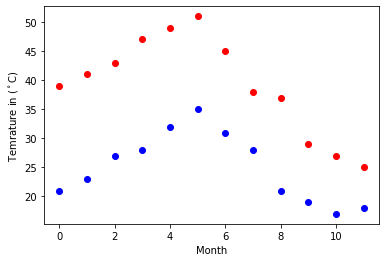

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Month')
ax.set_ylabel('Temrature in ($^\circ$C)')
ax.scatter(month, Min, c = 'b')
ax.scatter(month, Max, c = 'r')
plt.show()

In [ ]:
from scipy.optimize import curve_fit
def cosfun(x, a, b, c):
  return (a + b * np.cos((x + c) * 2 * np.pi / x.max()))

In [ ]:
pars_min, cov_min = curve_fit(f=cosfun, xdata=month, ydata=Min )
pars_max, cov_max = curve_fit(f=cosfun, xdata=month, ydata=Max )

In [ ]:
print(pars_min, pars_max)

[25.55626461 -7.74472961  0.93101294] [39.88861733 10.59083168 -4.16629844]


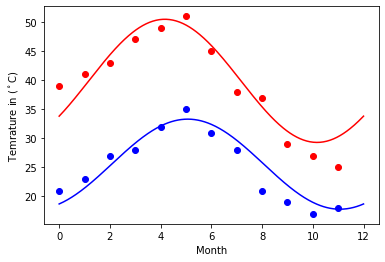

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Month')
days = np.linspace(0, 12, num=365)
ax.scatter(month, Min, c= 'b')
ax.plot(days, cosfun(days, *pars_min), c= 'b')
ax.scatter(months, Max, c = 'r')
plt.plot(days, cosfun(days, *pars_max), c = 'r')
ax.set_xlabel('Month')
ax.set_ylabel('Temrature in ($^\circ$C)')

plt.show()



Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [5]:
df.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [6]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['age'] = df['age'].fillna(df['age'].mean())

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.sex.value_counts()

1    844
0    466
Name: sex, dtype: int64

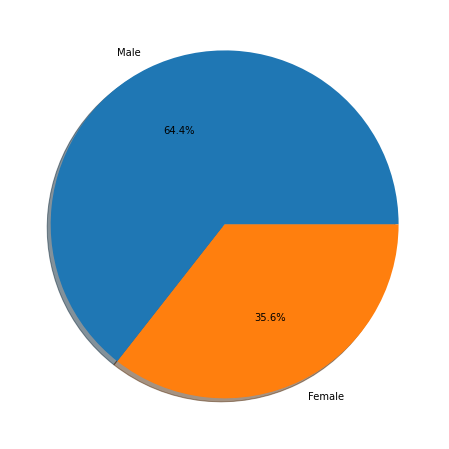

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.pie(df['sex'].value_counts(), labels=['Male','Female'], shadow=True, autopct='%1.1f%%')
plt.show()

In [ ]:
df.loc[df.sex=='male']['age']

1        0.916700
3       30.000000
5       48.000000
7       39.000000
9       71.000000
          ...    
1303    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
1309    29.881135
Name: age, Length: 844, dtype: float64

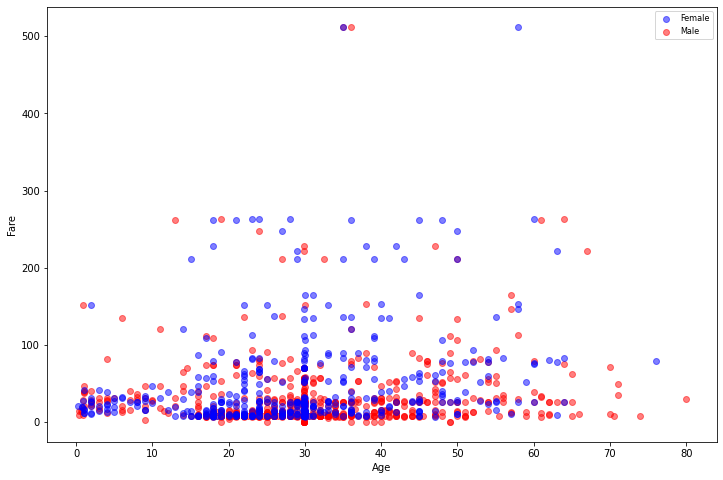

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
m = ax.scatter(df.loc[df.sex=='male']['age'],df.loc[df.sex=='male']['fare'], c='r', alpha = 0.5 )

f = ax.scatter(df.loc[df.sex=='female']['age'],df.loc[df.sex=='female']['fare'], c='b',  alpha = 0.5 )
plt.legend((f, m),
           ('Female', 'Male'),
           scatterpoints=1,
           fontsize=8)
plt.show()